In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [22]:
# Load MNIST dataset
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension (grayscale images need a single channel)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [23]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8840 - loss: 0.3863 - val_accuracy: 0.9832 - val_loss: 0.0566
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9828 - loss: 0.0561 - val_accuracy: 0.9883 - val_loss: 0.0389
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9903 - loss: 0.0336 - val_accuracy: 0.9882 - val_loss: 0.0386
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9926 - loss: 0.0235 - val_accuracy: 0.9883 - val_loss: 0.0366
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9942 - loss: 0.0170 - val_accuracy: 0.9905 - val_loss: 0.0342
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9958 - loss: 0.0125 - val_accuracy: 0.9922 - val_loss: 0.0375
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9971 - loss: 0.0095 - val_accuracy: 0.9908 - val_loss: 0.0349
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9974 - loss: 0.0085 - val_acc

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0369
Test accuracy: 0.9914


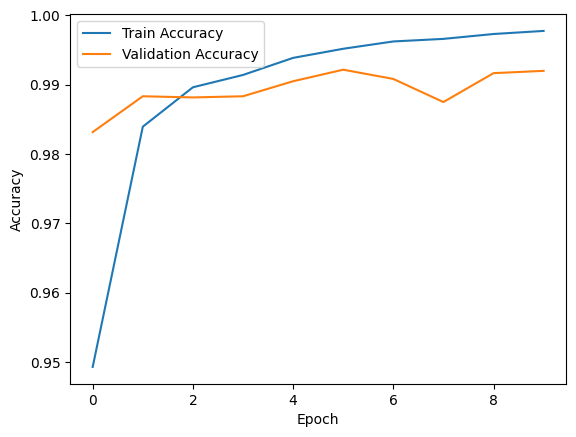

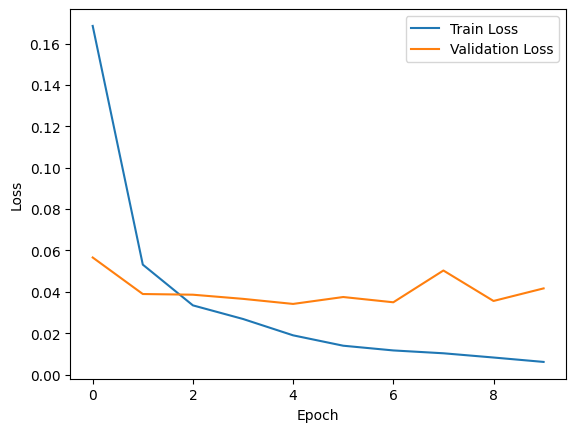

In [26]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [38]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_custom_image(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)
    confidence = prediction[0][predicted_label]

    return predicted_label, confidence

# Test a custom image
image_path = 'C:/Users/Maher/number 8.png'
label, conf = predict_custom_image(image_path)
print(f"Predicted Label: {label}, Confidence: {conf:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label: 8, Confidence: 1.00


In [8]:
model.save('mnist_cnn_model.h5')


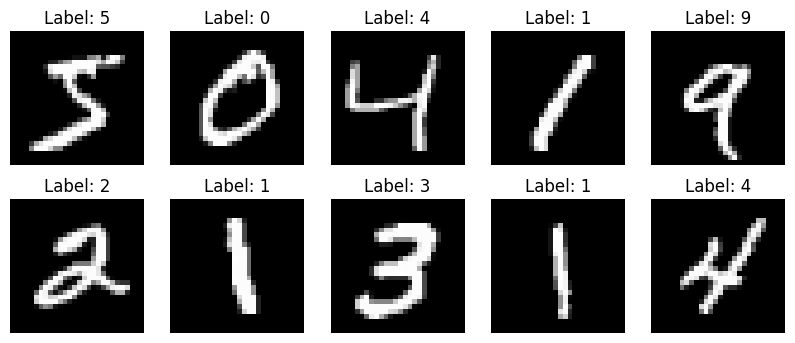

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Number of images to display
num_images_to_display = 10

# Set up the plot
plt.figure(figsize=(10, 4))

# Display the images and their corresponding labels
for i in range(num_images_to_display):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap="gray")  # Display the image in grayscale
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')  # Hide axes for better visualization

# Show the plot
plt.show()


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8636 - loss: 0.4969
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9594 - loss: 0.1400
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0952
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9794 - loss: 0.0701
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0520
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step


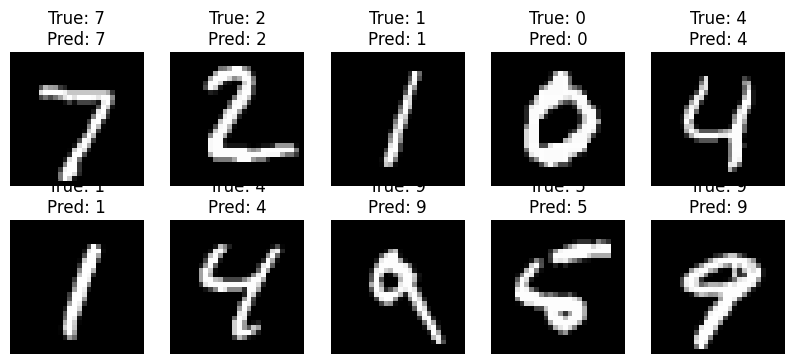

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Predict the labels for the test images
predictions = model.predict(test_images)

# Get the predicted classes (the index of the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Number of images to display
num_images_to_display = 10

# Set up the plot
plt.figure(figsize=(10, 4))

# Display the images, true labels, and predicted labels
for i in range(num_images_to_display):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i], cmap="gray")  # Display the image in grayscale
    plt.title(f"True: {np.argmax(test_labels[i])}\nPred: {predicted_labels[i]}")
    plt.axis('off')  # Hide axes for better visualization

# Show the plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


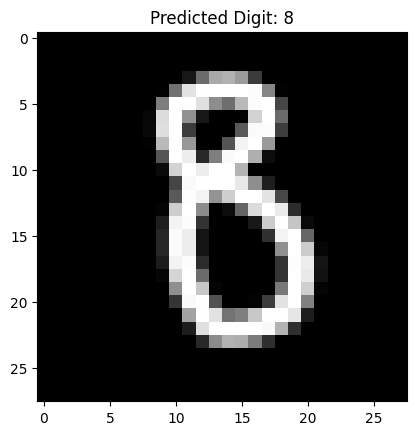

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


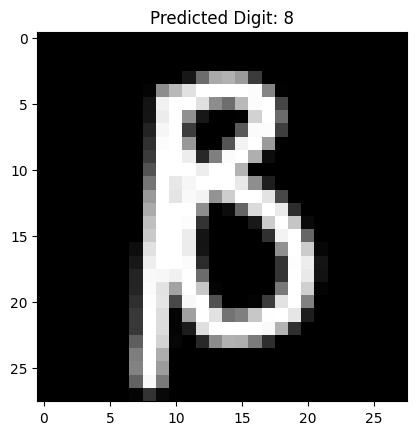

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


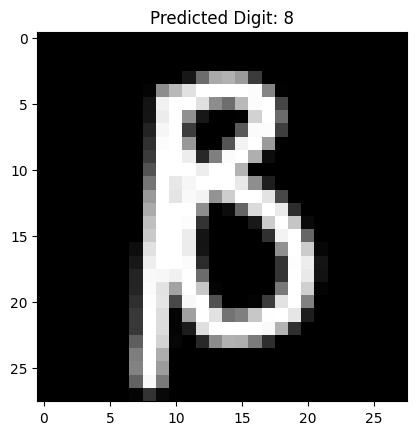

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


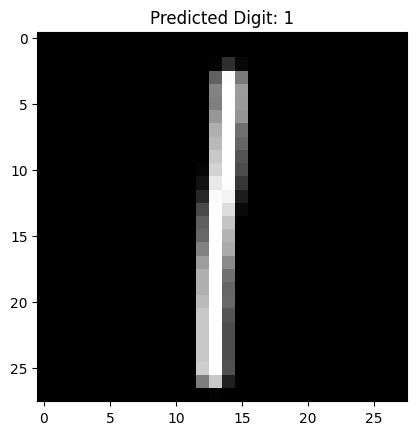

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


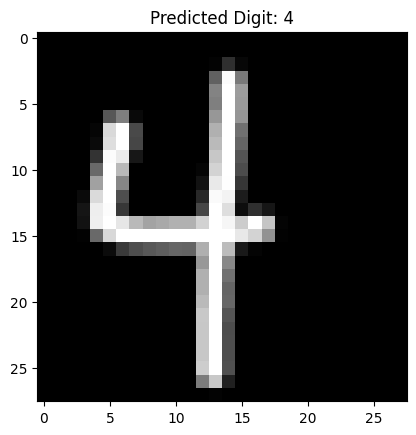

In [44]:
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST model (Ensure it is trained and saved beforehand)
model = tf.keras.models.load_model('mnist_cnn_model.h5')

# Create a Tkinter window
window = tk.Tk()
window.title("Draw a Digit")

# Set canvas dimensions
canvas_width = 280
canvas_height = 280

# Create a blank canvas
canvas = tk.Canvas(window, width=canvas_width, height=canvas_height, bg="black")
canvas.pack()

# Initialize a PIL image to store the drawn content
image = Image.new("L", (canvas_width, canvas_height), 0)
draw = ImageDraw.Draw(image)

# Function to clear the canvas
def clear_canvas():
    canvas.delete("all")
    draw.rectangle([0, 0, canvas_width, canvas_height], fill=0)  # Black background

# Function to draw on the canvas
def draw_on_canvas(event):
    x = event.x
    y = event.y
    radius = 10
    canvas.create_oval(x - radius, y - radius, x + radius, y + radius, fill="white", width=2)
    draw.ellipse([x - radius, y - radius, x + radius, y + radius], fill=255)

# Function to preprocess the image and make a prediction
def predict_digit():
    # Convert the image to 28x28 for MNIST model
    resized_image = image.resize((28, 28))
    
    # Convert to grayscale (MNIST images are single channel)
    image_array = np.array(resized_image)
    
    # Normalize the image
    image_array = image_array / 255.0  # Normalize to [0, 1]
    
    # Reshape to match the model input shape: (1, 28, 28, 1)
    image_array = image_array.reshape(1, 28, 28, 1)
    
    # Make prediction
    prediction = model.predict(image_array)
    
    # Get the predicted label
    predicted_label = np.argmax(prediction)

    # Display the prediction
    result_label.config(text=f"Predicted Digit: {predicted_label}")

    # Optionally, display the drawn image for verification
    plt.imshow(image_array.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Digit: {predicted_label}")
    plt.show()

# Button to predict the drawn digit
predict_button = tk.Button(window, text="Predict", command=predict_digit)
predict_button.pack()

# Button to clear the canvas
clear_button = tk.Button(window, text="Clear", command=clear_canvas)
clear_button.pack()

# Label to show the predicted result
result_label = tk.Label(window, text="Predicted Digit: ", font=("Helvetica", 14))
result_label.pack()

# Bind mouse movement to drawing
canvas.bind("<B1-Motion>", draw_on_canvas)

# Start the Tkinter event loop
window.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


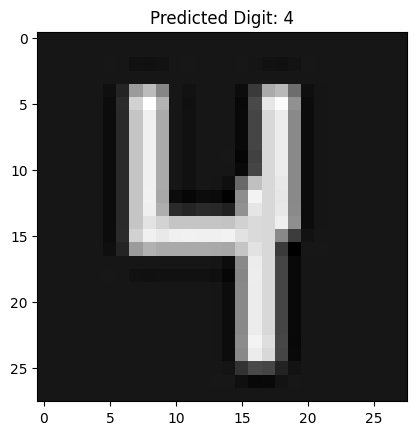

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


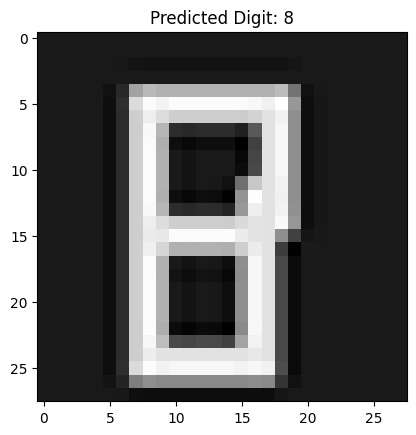

In [45]:
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST model (Ensure it is trained and saved beforehand)
model = tf.keras.models.load_model('mnist_cnn_model.h5')

# Canvas size
canvas_size = 20

# Create a Tkinter window
window = tk.Tk()
window.title("Draw a Digit")

# Set canvas dimensions (20x20)
canvas_width = canvas_size * 10  # Scale up for visibility
canvas_height = canvas_size * 10  # Scale up for visibility

# Create a blank canvas
canvas = tk.Canvas(window, width=canvas_width, height=canvas_height, bg="black")
canvas.pack()

# Initialize a PIL image to store the drawn content
image = Image.new("L", (canvas_size, canvas_size), 0)
draw = ImageDraw.Draw(image)

# Function to clear the canvas
def clear_canvas():
    canvas.delete("all")
    draw.rectangle([0, 0, canvas_size, canvas_size], fill=0)  # Black background

# Function to draw on the canvas
def draw_on_canvas(event):
    # Map canvas coordinates to pixel grid coordinates
    x = event.x // 10
    y = event.y // 10
    radius = 1  # A single pixel to be drawn
    canvas.create_rectangle(x * 10, y * 10, (x + 1) * 10, (y + 1) * 10, fill="white", outline="white")
    draw.rectangle([x, y, x + 1, y + 1], fill=255)

# Function to preprocess the image and make a prediction
def predict_digit():
    # Convert the image to 20x20 for MNIST model (already 20x20)
    image_array = np.array(image)

    # Normalize the image
    image_array = image_array / 255.0  # Normalize to [0, 1]

    # Reshape to match the model input shape: (1, 28, 28, 1)
    resized_image = Image.fromarray(image_array * 255).resize((28, 28))
    image_array = np.array(resized_image)
    
    # Reshape to (1, 28, 28, 1)
    image_array = image_array.reshape(1, 28, 28, 1)

    # Make prediction
    prediction = model.predict(image_array)

    # Get the predicted label
    predicted_label = np.argmax(prediction)

    # Display the prediction
    result_label.config(text=f"Predicted Digit: {predicted_label}")

    # Optionally, display the drawn image for verification
    plt.imshow(image_array.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Digit: {predicted_label}")
    plt.show()

# Button to predict the drawn digit
predict_button = tk.Button(window, text="Predict", command=predict_digit)
predict_button.pack()

# Button to clear the canvas
clear_button = tk.Button(window, text="Clear", command=clear_canvas)
clear_button.pack()

# Label to show the predicted result
result_label = tk.Label(window, text="Predicted Digit: ", font=("Helvetica", 14))
result_label.pack()

# Bind mouse movement to drawing
canvas.bind("<B1-Motion>", draw_on_canvas)

# Start the Tkinter event loop
window.mainloop()
